<a href="https://colab.research.google.com/github/barbarosugurkan/kahvelab-beam-analysis/blob/main/2025-05-24/2025-05-24_adc_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sıfırsız mean 83.0120793787748
Sıfırsız std 17.90059385812165
Sıfırlı mean 9.162952380952381
Sıfırlı std 26.684181489408754
[12, 9, 14, 13, 9, 11, 10, 6, 13, 7, 14, 11, 11, 10, 11, 9, 17, 11, 10, 10, 9, 8, 18, 14, 10, 6, 13, 10, 8, 15, 14, 10, 11, 9, 10, 12, 4, 5, 8, 7, 12, 9, 11, 9, 12, 15, 16, 16, 12, 10, 9, 10, 12, 11, 5, 6, 12, 13, 6, 13, 16, 13, 9, 10, 9, 13, 12, 11, 14, 12, 8, 6, 11, 18, 11, 12, 15, 11, 16, 12, 9, 8, 13, 14, 11, 10, 18, 8, 7, 8, 10, 7, 11, 12, 13, 16, 13, 7, 12, 18, 10, 14, 13, 13, 7]


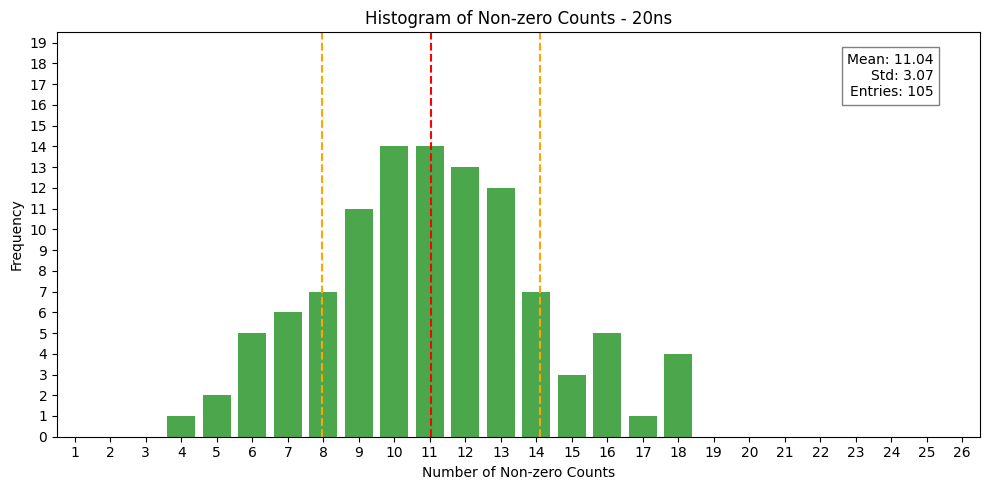

In [ ]:
import math
import matplotlib.pyplot as plt
from collections import Counter

butun_liste = []
sifirli_butun_liste = []
non_zero_list = []

# Ortalama hesaplama fonksiyonu
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# Standart sapma hesaplama fonksiyonu
def calculate_standard_deviation(numbers):
    mean = calculate_mean(numbers)
    variance = sum((x - mean) ** 2 for x in numbers) / len(numbers)
    return math.sqrt(variance)
for j in range(7,12):
    dosyapathust = '/content/drive/MyDrive/Colab Notebooks/adctestguncel/' + str(j)
    for i in range(21):
        if i<10:
            dosyapath = dosyapathust + '/SEMtest0.' + str(i) +  '.adc'
        elif 20>i>=10:
            dosyapath = dosyapathust + '/SEMtest1.' + str(i-10) + '.adc'
        elif i>=20:
            dosyapath = dosyapathust + '/SEMtest2.' + str(i - 20) + '.adc'
        liste = []
        sifirsiz_liste = []
        non_zero_freq = 0
        with open(dosyapath, 'r') as dosya:
            lines = dosya.readlines()[2:-1]
        for satir in lines:
            if len(satir) >= 17:
                uc_karakter = satir[14:17]
                sayi_str = ''.join([c for c in uc_karakter if c.isdigit()])
                if sayi_str:
                    sayi = int(sayi_str)
                    liste.append(sayi)
                else:
                    print(f"Satırda sayısal karakter yok: {satir}")

        #print(liste)

        for i in liste:
            sifirli_butun_liste.append(i)
            if i != 0:
                sifirsiz_liste.append(i)

                non_zero_freq += 1
        non_zero_list.append(non_zero_freq)
        #print(sifirsiz_liste)
        #print(non_zero_freq)
        for i in sifirsiz_liste:
            butun_liste.append(i)

        """print(f"Ortalama: {calculate_mean(liste)}")
        print(f"sifirsiz Ortalama: {calculate_mean(sifirsiz_liste)}")

        print(f"Standart Sapma: {calculate_standard_deviation(liste)}")
        print(f"sifirsiz Standart Sapma: {calculate_standard_deviation(sifirsiz_liste)}")"""

"""    # Histogram grafiğini oluşturma
plt.figure(figsize=(10, 5))

    # Tüm veriler için histogram
plt.subplot(1, 2, 1)
plt.hist(butun_liste, bins=10, color='blue', alpha=0.7)
plt.title(f'{dosyapath} - Tüm Veriler')
plt.xlabel('Değerler')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()"""

butun_liste_mean = calculate_mean(butun_liste)
butun_liste_std = calculate_standard_deviation(butun_liste)
butun_liste_mean_plus_std = butun_liste_mean + butun_liste_std
butun_liste_mean_minus_std = butun_liste_mean - butun_liste_std

print("Sıfırsız mean",calculate_mean(butun_liste))
print("Sıfırsız std",calculate_standard_deviation(butun_liste))


print("Sıfırlı mean",calculate_mean(sifirli_butun_liste))
print("Sıfırlı std",calculate_standard_deviation(sifirli_butun_liste))

print(non_zero_list)


#Bütün dataların histogramı
"""plt.figure(figsize=(10, 5))
frekanslar_butun = Counter(butun_liste)
x_butun = list(frekanslar_butun.keys())
y_butun = list(frekanslar_butun.values())
plt.bar(x_butun, y_butun, color='green', alpha=0.7)

plt.axvline(butun_liste_mean, color='red', linestyle='--', label=f'Ortalama: {butun_liste_mean:.2f}')
plt.axvline(butun_liste_mean_plus_std, color='orange', linestyle='--', label=f'Ortalama + 1 Std: {butun_liste_mean_plus_std:.2f}')
plt.axvline(butun_liste_mean_minus_std, color='orange', linestyle='--', label=f'Ortalama - 1 Std: {butun_liste_mean_minus_std:.2f}')

plt.fill_betweenx([0, max(y_butun)], butun_liste_mean_minus_std, butun_liste_mean_plus_std, color='orange', alpha=0.05, label='±1 Std Bölgesi')
plt.text(butun_liste_mean, max(y_butun), f'Ortalama: {butun_liste_mean:.2f}', ha='center', va='bottom', color='red')

plt.title('Tüm Dosyalar - Sıfırsız Veriler- 10ns')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.tight_layout()
plt.show()"""

non_zero_list_mean = calculate_mean(non_zero_list)
non_zero_list_std = calculate_standard_deviation(non_zero_list)
non_zero_list_mean_plus_std = non_zero_list_mean + non_zero_list_std
non_zero_list_mean_minus_std = non_zero_list_mean - non_zero_list_std

#Sıfırdan farklı olanların histogramı

plt.figure(figsize=(10, 5))
frekanslar_butun = Counter(non_zero_list)
x_butun = list(frekanslar_butun.keys())
y_butun = list(frekanslar_butun.values())
plt.bar(x_butun, y_butun, color='green', alpha=0.7)

plt.axvline(non_zero_list_mean, color='red', linestyle='--', label=f'Ortalama: {non_zero_list_mean:.2f}')
plt.axvline(non_zero_list_mean_plus_std, color='orange', linestyle='--', label=f'Ortalama + 1 Std: {non_zero_list_mean_plus_std:.2f}')
plt.axvline(non_zero_list_mean_minus_std, color='orange', linestyle='--', label=f'Ortalama - 1 Std: {non_zero_list_mean_minus_std:.2f}')

# Create the text string for the "legend"
text_str = f'Mean: {non_zero_list_mean:.2f}\nStd: {non_zero_list_std:.2f}\nEntries: {len(non_zero_list)}'

# Add the text at the top right corner
plt.text(0.95, 0.95, text_str, transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='white', alpha=0.5))

# Set x-axis ticks to show all integers from min to max
min_count = min(non_zero_list)
max_count = max(non_zero_list)
min_freq = min(y_butun)
max_freq = max(y_butun)

#Elle manuel scale yapmak için burası
plt.xticks(range(0, 27))
plt.xlim(0.5, 26.5)
plt.yticks(range(0, 20))
plt.ylim(0, 19.5)

#Otomatik datalara göre scale
"""plt.xticks(range(min_count, max_count + 1))
plt.xlim(min_count - 0.5, max_count + 0.5)
plt.yticks(range(min_freq, max_freq + 1))
plt.ylim(min_freq - 0.5, max_freq + 0.5)"""

plt.title('Histogram of Non-zero Counts - 20ns')
plt.xlabel('Number of Non-zero Counts')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
